 Lesson 3 - Statistics Review - Review of Mean Reversion, Hypothesis Testing, Simple Regression

In [3]:
import pandas as pd
import tabula
import numpy as np
import random
import os
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Central Limit Theorem VS (Central Tendancy AND Mean Reversion)

<p>The <b>central limit theorem</b> states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.</p>
<p><b>VS</b></p>
<p><b>Central Tendancy</b> refers to the "middle" value or perhaps a typical value of the data, and is often measured using the mean, median, and mode.</p>  
<p><b>Reversion to the mean</b>, also called regression to the mean, is the statistical phenomenon stating that the greater the deviation of a random variate from its mean, the greater the probability that the next measured variate will deviate less far. In other words, an extreme event is likely to be followed by a less extreme event.</p>

   

### BASEBALL:  Regression toward the mean - Steve Slowinsky - February 16, 2020
<p><b><i>"RTM is not a positive or negative. It’s a push toward average."</i></b></p>

<p>In conversations about baseball statistics, the word “regression” is used quite often, but there are essentially two different meanings associated with the word and it’s important to separate them because they mean different things. Colloquially, the word “regress” is often used to mean movement backwards. The dictionary definition of this is something like “returning to a former or less developed state.” You will absolutely hear people use this word to describe baseball players. If a good player gets worse, they can be said to have regressed. That is, their talent has declined.</p>
<p>However, this is not usually what we mean when we are talking about baseball statistics, so it’s important to be precise with your terminology. We are typically talking about the statistical concept known as “regression to/toward the mean.” Regression toward the mean (RTM for clarity in this article) is the concept that any given sample of data from a larger population (think April stats) may not be perfectly in line with the underlying average (think true talent/career stats), but that going forward you would expect the next sample to be closer to the underlying average than the first sample. Observations tend to cluster around the average value, even if the previous value is unusual.</p>
<p>Let’s use a concrete example. Imagine you have a player with a career OBP of .350. Over the last few seasons it’s been .340, .360, .340, .360, and .350. Let’s assume the league’s run environment has stayed the same and the player is around 28, so there is no particular reason to expect his talent level to change or for his OBP to spike due to a clear external factor. He is, as best as we can tell, a true talent .350 OBP hitter.</p>
<p>But now let’s imagine we observe his next 100 PA in which he posts a .300 OBP. What should we think about his next 500-600 PA based on the information we have? In other words, do those 100 PA at .300 OBP alter the way we think about the player and by how much?</p>
<p>Any sample of PA contain potentially useful information. Maybe he’s hurt, maybe he’s aging poorly, maybe the league learned to exploit a weakness. Maybe his true talent has changed. But when we are asked to assess this player, the previous five seasons carry a lot of weight. We don’t just forget about them because our player had a bad April. So to forecast his future performance, we need to consider RTM. It’s more likely that he will perform close to his career average (or some weighted version of it) than the sample of plate appearances immediately preceding the question.</p>
<p>RTM is not a positive or negative. It’s a push toward average. If our player had posted a .400 OBP, the exact same properties would apply. To put it another way, any one small sample is less informative than a must larger sample even if the larger sample is slightly older. So when a player gets off to a hot or cold start, we want to factor in RTM.</p>
<p>Keep in mind there is no “correct” way to account of RTM in baseball. It’s a conceptual framework, and like most conceptual frameworks there are exceptions. Players’ underlying true talent does change from time to time based on a variety of factors. If a pitcher learns a new pitch, their history is still useful, but it’s much less useful than it is for a pitcher who is using their same arsenal.</p>
<p>The idea behind using RTM in baseball is that we can’t directly measure true talent, we simply infer it from observing outcomes on the field. Baseball has a lot of randomness that makes individual observations fluctuate around the player’s true talent. Picture a line drive being caught by a leaping defender and a weak grounder finding a hole. Because we can’t measure true talent directly, we can’t say for sure when it changes and when we are simply observing a set of data points that are different from that talent level for unrelated reasons.</p>
<p>In other words, because of the randomness (factors unrelated to the talent of the player we care about) involved in generating baseball outcomes, it takes a long time for the statistics we create to tell us exactly how good a player is. This means that any one section of data might not be a clear reflection of the underlying average. So going forward, we expect the data to look more like the overall numbers rather than a single, recent sample. We must regress any new data toward the mean.</p>
<p>As I noted, this is not a formulaic rule. Sometimes players talent level changes. But RTM is accounting for the fact that you can observe outcomes that are not in line with a player’s true talent simply due to randomness and that going forward true talent is a better predictor. Think of it this way:</p>
<p>Outcomes = Talent + Randomness</p>
<p>We can only observe outcomes, but we care about talent. We want to sort out randomness by getting the randomness to cancel itself out over a long period of time. Randomness is most likely to confuse you in short samples, so that’s why we use larger samples (i.e. regression toward the mean) to inform our opinions.</p>






## Test The Central Limit Theorem

### Get the data

The data consist of average attendance figures at home games of college football in 2014 and 2015

In [2]:
football_stats_2014 = tabula.read_pdf('http://fs.ncaa.org/Docs/stats/football_records/Attendance/2014.pdf', pages = 2, pandas_options={'header': None})
football_stats_2015 = tabula.read_pdf('http://fs.ncaa.org/Docs/stats/football_records/Attendance/2015.pdf', pages = 2, pandas_options={'header': None})

Got stderr: Sep 08, 2020 9:29:19 AM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO: Your current java version is: 1.8.0_171
Sep 08, 2020 9:29:19 AM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO: To get higher rendering speed on old java 1.8 or 9 versions,
Sep 08, 2020 9:29:19 AM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   update to the latest 1.8 or 9 version (>= 1.8.0_191 or >= 9.0.4),
Sep 08, 2020 9:29:19 AM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   or
Sep 08, 2020 9:29:19 AM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   use the option -Dsun.java2d.cmm=sun.java2d.cmm.kcms.KcmsServiceProvider
Sep 08, 2020 9:29:19 AM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   or call System.setProperty("sun.java2d.cmm", "sun.java2d.cmm.kcms.KcmsServiceProvider")

Got stderr: Sep 08, 2020 9:29:26 AM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO: Your current java version is: 1.8.0_171
Sep 08, 2020 9:29:26 AM

In [1]:
def get_football_attendance_data(save_to_pickle = True):
    
    path_2014 = 'http://fs.ncaa.org/Docs/stats/football_records/Attendance/2014.pdf'
    path_2015 = 'http://fs.ncaa.org/Docs/stats/football_records/Attendance/2015.pdf'

    football_stats_2014 = tabula.read_pdf(path_2014, pages = (7,8), pandas_options={'header': None})
    football_stats_2015 = tabula.read_pdf(path_2015, pages = (7,8), pandas_options={'header': None})
    
    # Munge 2014 Football Data
    table1 = football_stats_2014[0].iloc[:,0:4].rename(columns={0: 'School', 1: '2014 Home Games', 2:'2014 Attendance', 3: '2014 Average Attendance'})
    table2 = football_stats_2014[0].iloc[:,4:8].rename(columns={4: 'School', 5: '2014 Home Games', 6:'2014 Attendance', 7: '2014 Average Attendance'})
    table3 = football_stats_2014[1].iloc[0:9,0:3].rename(columns={0: 'School', 1:'2014 Attendance', 2: '2014 Average Attendance'})
    #table3[['School', '2014 Home Games']] = football_stats_2014['School'].str.extract(r'(.*?)\s+([A-Z]{1,}\d{3,})?$', expand=True)

    # Split the number of home games from the name column
    table3['2014 Home Games'] = table3['School'].str.rsplit(' ', n = 1, expand = True)[1] 
    table3['School'] = table3['School'].str.rsplit(' ', n = 1, expand = True)[0] 
    table4 = football_stats_2014[1].iloc[0:8,3:7].rename(columns={3: 'School', 4: '2014 Home Games', 5:'2014 Attendance', 6: '2014 Average Attendance'})

    football_2014 = pd.concat([table1,table2, table3, table4]).sort_values('School').reset_index().drop(columns = 'index')

    # Munge 205 Football Data
    table1 = football_stats_2015[0].iloc[:,0:4].rename(columns={0: 'School', 1: '2015 Home Games', 2:'2015 Attendance', 3: '2015 Average Attendance'})
    table2 = football_stats_2015[0].iloc[:,4:8].rename(columns={4: 'School', 5: '2015 Home Games', 6:'2015 Attendance', 7: '2015 Average Attendance'})
    table3 = football_stats_2015[1].iloc[0:9,0:3].rename(columns={0: 'School', 1:'2015 Attendance', 2: '2015 Average Attendance'})

    # split the number of home games from the name column
    table3['2015 Home Games'] = table3['School'].str.rsplit(' ', n = 1, expand = True)[1] 
    table3['School'] = table3['School'].str.rsplit(' ', n = 1, expand = True)[0] 
    table4 = football_stats_2015[1].iloc[0:8,3:7].rename(columns={3: 'School', 4: '2015 Home Games', 5:'2015 Attendance', 6: '2015 Average Attendance'})

    football_2015 = pd.concat([table1,table2, table3, table4]).sort_values('School').reset_index().drop(columns = 'index')

    # Merge the data sets
    football_stats = football_2014.merge(football_2015, left_on='School', right_on = 'School')

    # Remove the comma delimitted values in the columns and convert to integer values
    football_stats['2014 Average Attendance'] = football_stats['2014 Average Attendance'].str.replace(',', '')
    football_stats['2014 Attendance'] = football_stats['2014 Attendance'].str.replace(',', '')
    football_stats['2015 Average Attendance'] = football_stats['2015 Average Attendance'].str.replace(',', '')
    football_stats['2015 Attendance'] = football_stats['2015 Attendance'].str.replace(',', '')

    # Make all values of type int
    football_stats = football_stats.astype({'2014 Average Attendance':int,
                                            '2014 Attendance': int,
                                            '2014 Home Games': int, 
                                            '2015 Home Games': int, 
                                            '2015 Attendance': int,
                                            '2015 Average Attendance': int})

    if save_to_pickle:
        
        # Save as a pickle file
        football_stats.to_pickle('./football_stats.pkl')
    
    return football_stats


In [2]:
if os.path.exists('./football_stats.pkl'):
    football_stats = pd.read_pickle('./football_stats.pkl')
    print("Yay! It's there!")

else:
    football_stats = get_football_attendance_data()
print('Length of the dataset is ', len(football_stats))
football_stats.head(50)

NameError: name 'os' is not defined

In [3]:
# 2014 football data
table1 = football_stats_2014[0].iloc[0:15,1:4].rename(columns={1: 'School', 3: '2014 Average Attendance'}).drop(columns = 2)
table1['2014 Home Games'] = table1['School'].str[-2:].astype(int)
table1['School'] = table1['School'].str[:-2]
table2 = football_stats_2014[0].iloc[0:15,5:9].rename(columns={5: 'School', 6: '2014 Home Games', 8: '2014 Average Attendance'}).drop(columns = 7)
football_2014 = pd.concat([table1,table2])
football_2014['School'].str.lstrip()

# 2015 football data
table1 = football_stats_2015[0].iloc[0:15,0:4].rename(columns={0: 'School', 1: '2015 Home Games', 3: '2015 Average Attendance'}).drop(columns = 2)
table1['School'] = table1['School'].str.split('.').str[1].str.lstrip()
table2 = football_stats_2015[0].iloc[0:15,5:9].rename(columns={5: 'School', 6: '2015 Home Games', 8: '2015 Average Attendance'}).drop(columns = 7)
football_2015 = pd.concat([table1,table2])
football_2015['School'].str.lstrip()

# merge the data sets
football_stats = football_2014.merge(football_2015, left_on='School', right_on = 'School')
football_stats['2014 Average Attendance'] = football_stats['2014 Average Attendance'].str.replace(',', '')
football_stats['2015 Average Attendance'] = football_stats['2015 Average Attendance'].str.replace(',', '')

football_stats = football_stats.astype({'2014 Average Attendance':int, 
                                        '2014 Home Games': int, 
                                        '2015 Home Games': int, 
                                        '2015 Average Attendance': int})
football_stats

,School,2014 Average Attendance,2014 Home Games,2015 Home Games,2015 Average Attendance
0,Texas A&M,105123,6,7,103622
1,Michigan,104909,7,7,110168
2,Alabama,101534,7,7,101112
3,Tennessee,99754,7,7,100584
4,Texas,94103,6,6,90035
5,Georgia,92746,7,7,92746
6,Nebraska,91249,7,7,89998
7,Auburn,87451,7,7,87451
8,Florida,85834,6,7,90065
9,Oklahoma,85162,6,6,85357


### Take a simple random sample

<p>In statistics, a <b>simple random sample</b> is a subset of individuals (a sample) chosen from a larger set (a population). Each individual is chosen randomly and entirely by chance, such that each individual has the same probability of being chosen at any stage during the sampling process, and each subset of k individuals has the same probability of being chosen for the sample as any other subset of k individuals. This process and technique is known as simple random sampling, and should not be confused with systematic random sampling. A simple random sample is an unbiased surveying technique.</p>
<p>In small populations and often in large ones, such sampling is typically done <b>"without replacement"</b>, i.e., one deliberately avoids choosing any member of the population more than once. Although simple random sampling can be conducted with replacement instead, this is less common and would normally be described more fully as simple random sampling <b>with replacement.</b> Sampling done without replacement is no longer independent, but still satisfies exchangeability, hence many results still hold. Further, for a small sample from a large population, sampling without replacement is approximately the same as sampling with replacement, since the probability of choosing the same individual twice is low.</p>

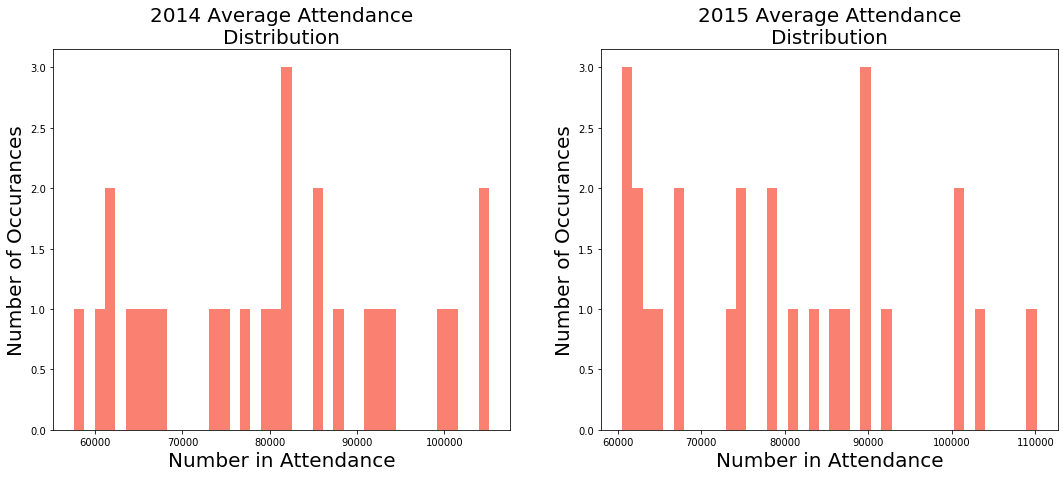

In [4]:
fig = plt.figure(figsize = (18,7))

ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)


ax1.hist(football_stats['2014 Average Attendance'], bins = 40, color = 'salmon')
ax1.set_title('2014 Average Attendance\nDistribution', fontsize = 20)
ax1.set_xlabel('Number in Attendance', fontsize = 20)
ax1.set_ylabel('Number of Occurances', fontsize = 20)

ax2.hist(football_stats['2015 Average Attendance'], bins = 40, color = 'salmon')
ax2.set_title('2015 Average Attendance\nDistribution', fontsize = 20)
ax2.set_xlabel('Number in Attendance', fontsize = 20)
ax2.set_ylabel('Number of Occurances', fontsize = 20)

plt.show()



In [11]:
num_samples = 1000
sample_size = 1000

sample_means_list = []

for c in range(num_samples):
    
    sample_list = []

    for i in range(sample_size):

        random_number = random.randint(0,len(football_stats)-1)
        sample_statistic = football_stats['2015 Average Attendance'].loc[random_number,] # random sample 
        sample_list.append(sample_statistic)

    sample_mean = sum(sample_list)/len(sample_list)
    sample_mean = round(sample_mean,2)  
    
    sample_means_list.append(sample_mean)
    

### Test the Central Limit Theorem

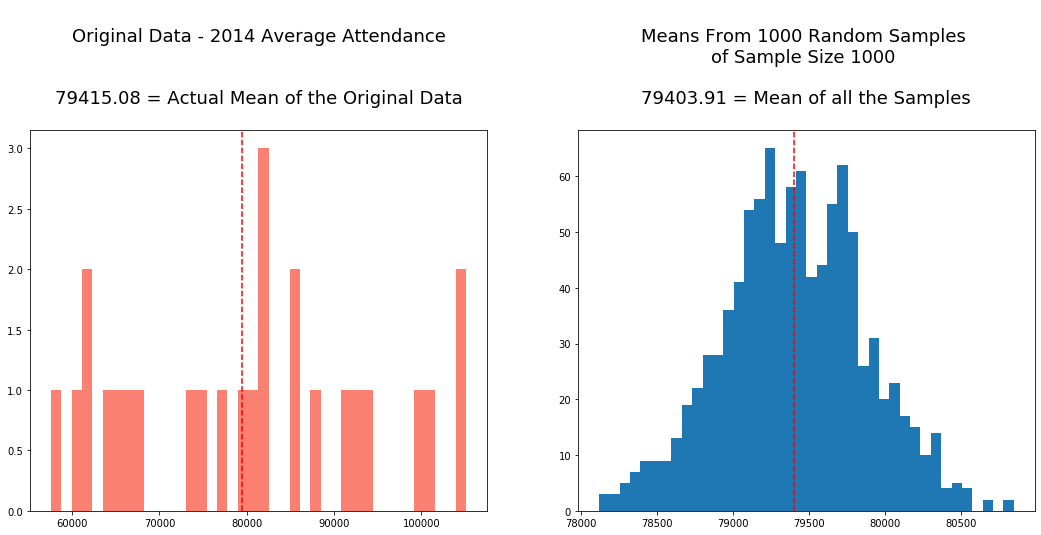

In [12]:
samples_mean = sum(sample_means_list)/len(sample_means_list)
samples_mean = round(samples_mean,2)

actual_mean = football_stats['2015 Average Attendance'].mean()
actual_mean = round(actual_mean,2)

fig = plt.figure(figsize = (18,7))

ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)

title1 = '\nMeans From {} Random Samples \nof Sample Size {} \n\n{} = Mean of all the Samples\n'.format(num_samples, sample_size, samples_mean)
title2 = '\nOriginal Data - 2014 Average Attendance\n\n\n{} = Actual Mean of the Original Data\n'.format(actual_mean)

ax1.hist(football_stats['2014 Average Attendance'], bins = 40, color = 'salmon')
ax1.axvline(x = actual_mean, color = 'red', linestyle = '--')
ax1.set_title(title2, fontsize = 18)

ax2.hist(sample_means_list, bins = 40)
ax2.axvline(x = samples_mean, color = 'red', linestyle = '--')
ax2.set_title(title1, fontsize = 18)
plt.show()


### Resulting Standardized Normal Curve

<p>"The normal distribution is the most important probability distribution in statistics because it fits many natural phenomena. For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution. It is also known as the Gaussian distribution and the bell curve."</p>

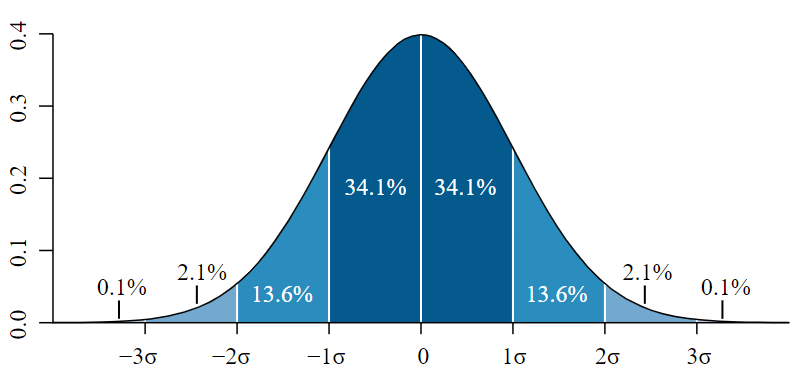

# SEGUE - Ronald Fisher and the Lady Tasting Tea 
<p><b>How a tea-tasting test led to a breakthrough in statistics - THE IRISH TIMES</b></p> 
<p>That’s Maths: Null hypothesis used to examine ability to tell if milk or water added first</p>

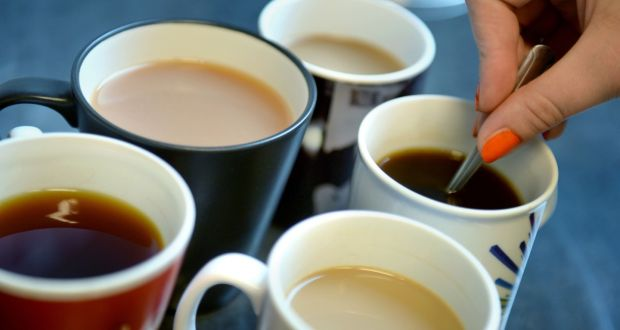

<p>One hundred years ago, an English lady, Dr Muriel Bristol, amazed some leading statisticians by proving that she could determine by taste the order in which the constituents are poured in a cup of tea. One of the statisticians was Ronald Fisher. The other was William Roach, who was to marry Bristol shortly afterwards.</p>
<p>Many decisions in medicine, economics and other fields depend on carefully designed experiments. For example, before a new treatment is proposed, its efficacy must be established by a series of rigorous tests. Everyone is different, and no one course of treatment is necessarily best in all cases. Statistical evaluation of data is an essential part of the evaluation of new drugs.</p>
<p>Fisher investigated the design of statistical tests and described many of his ideas in a book <b>The Design of Experiments</b>. To exemplify some key ideas, he described a quirky experiment to investigate Bristol’s claim that she could distinguish if the milk was poured before or after the tea.</p>
<p>Shortly after Fisher had moved to Rothamsted research station in 1919, he poured a cup of tea and offered it to Bristol. She declined, saying that she preferred the milk to be poured first. The arrogant young Fisher scoffed at this, insisting that it could not possibly make any difference, but Bristol maintained her stance, assuring him that she would always know the difference. Overhearing this exchange, another scientist, Roach said, “Let’s test her.”</p>
<p>How should the test be arranged? How many cups of tea should be poured? In what order should they be presented? How about miscellaneous factors such as temperature, sweetness and so on? How was a conclusion to be drawn from the results? Fisher considered all these factors, and more, in his book.</p>
<p><b>RANDOMISE</b></p>
<p>Fisher proposed to present eight cups to tea to the lady, four of each variety (milk first or tea first). Ideally, they should be identical in every respect except the order of pouring. He argued that the best way to present the drinks was to randomise the order.</p>
<p><b><i>The experiment: Provide a subject with 8 randomly ordered cups of tea – 4 prepared by first pouring the tea, then adding milk, 4 prepared by first pouring the milk, then adding the tea. The subject has to select 4 cups prepared by one method. Judging cups by direct comparison is allowed. The method employed in the experiment is fully disclosed to the subject.</i></b></p>



<b>4 teacups are selected from the 8 available teacups.</b>
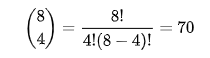

<b>Therefore there are 70 possible combinations!</b>

<b><i> The test statistic is a simple count of the number of successes in selecting the 4 cups (the number of cups of the given type successfully selected). <b>4 successes has 1 chance out of 70 (≈ 1.4% < 5%) of occurring, whereas at least 3 of 4 successes has a probability of (16+1)/70 (≈ 24.3% > 5%)</i></b>


<p>Assuming that there is no ability to discriminate, each choice is correct or incorrect with equal probability. Thus, if eight cups are presented, the four cups chosen as “milk first” are equally likely to be any four of the eight. How many ways are there of selecting four items out of eight? This is a standard problem in combinatorics, and the answer is written as Choose (8,4). There is a button on most scientific calculators to evaluate this, and the result is 70.</p>
<p>If Bristol had no ability to distinguish between the drinks, each of these 70 ways was equally probable. But her selection would be completely correct for only one of the 70 cases. So, if she had no ability to taste the difference, she had only a 1-in-70 chance of making no errors.</p>
<p>The assumption that Bristol had no skill is known as the null hypothesis. It was introduced by Fisher, who also proposed a threshold probability of 1-in-20 or 5 per cent as a limit for statistical significance.</p>
<p>The null hypothesis is assumed to be true unless evidence emerges that indicates that it is invalid. In the present case, it implies that there is no relationship between the choices Bristol made in each case and the actual variety of the drink.</p>
<p>Bristol successfully identified the correct category in each of the eight cases. Since the probability of this happening by chance was about 1.4 per cent, well below the threshold, Fisher was forced to reject the null hypothesis and concede that Dr Muriel Bristol was indeed gifted with the ability to distinguish by taste the order of pouring.</p>

# Hypothesis Testing

<b>Hypothesis testing</b> is an essential procedure in statistics. A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data. When we say that a finding is statistically significant, it’s thanks to a hypothesis test.

<p><b>Null hypothesis :-</b> In inferential statistics, the null hypothesis is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups
In other words it is a basic assumption or made based on domain or problem knowledge.</p>

<p><b>Alternative hypothesis :-</b> The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis. It is usually taken to be that the observations are the result of a real effect (with some amount of chance variation superposed)</p>

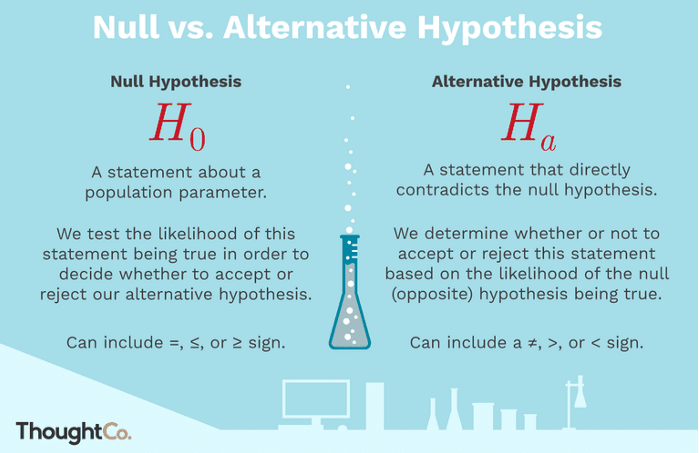

## Significance Level

<p><b>Level of significance:</b> Refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%.</p>
<p>This is normally denoted with <b>alpha</b> and generally it is 0.05 or 5% , which means your output should be 95% confident to give similar kind of result in each sample.</p>

## Revisiting the Normal Distribution and Standard Deviation 
<p>In statistics, the <b>standard deviation</b> is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the <b>expected value</b>) of the set, while a high standard deviation indicates that the values are spread out over a wider range.</p>

<p>Standard deviation may be abbreviated <b>SD</b>, and is most commonly represented in mathematical texts and equations by the lower case Greek letter sigma <b>σ</b>, for the population standard deviation, or the Latin letter <b>s</b>, for the sample standard deviation. (For other uses of the symbol σ in science and mathematics see the main article.)</p>

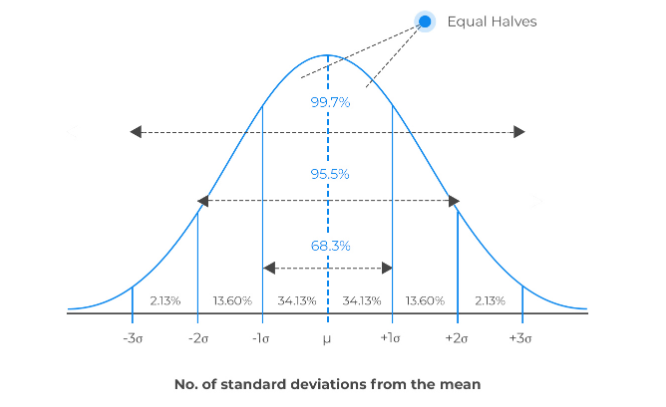

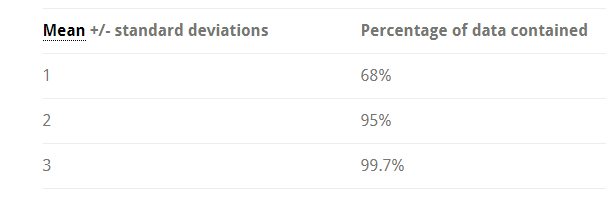

## One Tailed Test vs. Two Tailed Test

<p><b>One tailed test :-</b> A test of a statistical hypothesis , where the region of rejection is on only one side of the sampling distribution , is called a one-tailed test.</p>
<p><b>Example :-</b>The average attendance of all the schools was greater than 80,000 in 2014</p>


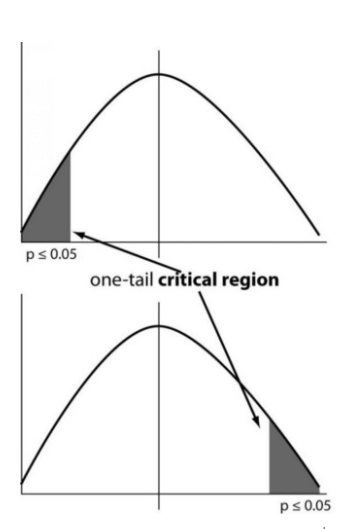

<p><b>Two-tailed test :-</b> A two-tailed test is a statistical test in which the critical area of a distribution is two-sided and tests whether a sample is greater than or less than a certain range of values. If the sample being tested falls into either of the critical areas, the alternative hypothesis is accepted instead of the null hypothesis.</p>
<p><b>Example :</b> The difference in average attendance between 2014 and 2015 is not different.</p>

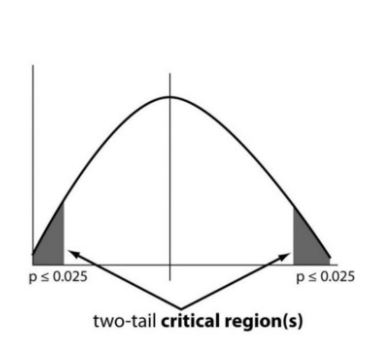

## False Positive vs. False Negative

<b>FALSE POSITIVE</b> or <b>"Type I error":</b> When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

<b>FALSE NEGATIVE</b> or <b>"Type II errors":</b> When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

## Degrees of Freedom
<p><b>Definition:</b>In statistics, the number of degrees of freedom is the number of values in the final calculation of a statistic that are free to vary. The number of independent ways by which a dynamic system can move, without violating any constraint imposed on it, is called number of degrees of freedom.</p>

<p><b>Degree of freedom :-</b> Now imagine you’re not into hats. You’re into data analysis.You have a data set with 10 values. If you’re not estimating anything, each value can take on any number, right? Each value is completely free to vary.But suppose you want to test the population mean with a sample of 10 values, using a 1-sample t test. You now have a constraint — the estimation of the mean. What is that constraint, exactly? By definition of the mean, the following relationship must hold: The sum of all values in the data must equal n x mean, where n is the number of values in the data set.</p>
    
<p>So if a data set has 10 values, the sum of the 10 values must equal the mean x 10. If the mean of the 10 values is 3.5 (you could pick any number), this constraint requires that the sum of the 10 values must equal 10 x 3.5 = 35.</p>

<p>With that constraint, the first value in the data set is free to vary. Whatever value it is, it’s still possible for the sum of all 10 numbers to have a value of 35. The second value is also free to vary, because whatever value you choose, it still allows for the possibility that the sum of all the values is 35.</p>

# Widely Used Hypothesis Testing Techniques

- T Test ( Student T test)
- Z Test
- ANOVA Test
- Chi-Square Test

## Focus on the T-Test

<p><b>T- Test :-</b> A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features. It is mostly used when the data sets, like the set of data recorded as outcome from flipping a coin a 100 times, would follow a normal distribution and may have unknown variances. T test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population.</p>
<p>
T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.
</p>



## One Sample T-Test


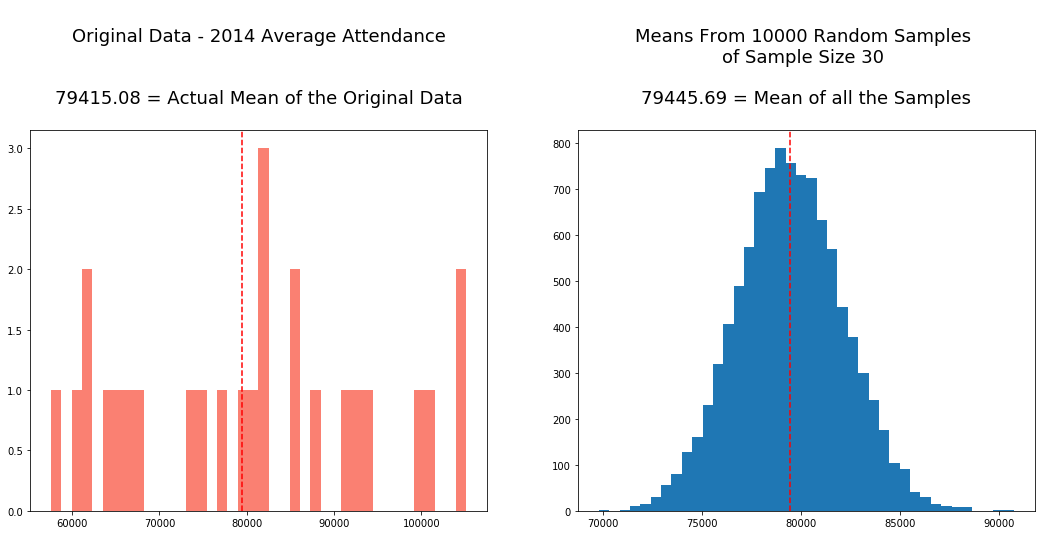

In [168]:
fig = plt.figure(figsize = (18,7))
ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)
title1 = '\nMeans From {} Random Samples \nof Sample Size {} \n\n{} = Mean of all the Samples\n'.format(num_samples, sample_size, samples_mean)
title2 = '\nOriginal Data - 2014 Average Attendance\n\n\n{} = Actual Mean of the Original Data\n'.format(actual_mean)
ax1.hist(football_stats['2014 Average Attendance'], bins = 40, color = 'salmon')
ax1.axvline(x = actual_mean, color = 'red', linestyle = '--')
ax1.set_title(title2, fontsize = 18)
ax2.hist(sample_means_list, bins = 40)
ax2.axvline(x = samples_mean, color = 'red', linestyle = '--')
ax2.set_title(title1, fontsize = 18)
plt.show()

### Variant One
<b>VARIANT ONE</b>:  In this one-sample t-test, we test the mean of a sample against a particular value. 
<p><b>One sample t-test :</b> The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.</p>
<p><b>Example :</b>- We have 26 average attendances and we are checking whether avg attendance is similar to the average of the sample means we looked at before. (check code below for that using python)

- H_0: the mean result of samples mean is the same as the population mean
- H_1: the mean result of samples mean is not the same as the population mean

In [170]:
from scipy.stats import ttest_1samp

attendance_2014 = football_stats['2014 Average Attendance']

#hypothesis = football_stats['2014 Average Attendance'].mean()
null_hypothesis = samples_mean = round(samples_mean,2)

tset, pval = ttest_1samp(attendance_2014, null_hypothesis)

print('t-statistics: ',tset,'p-values: ',pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

t-statistics:  0.24269734975516205 p-values:  0.8102199899502694
we are accepting null hypothesis


### Variant Two

<b>VARIANT TWO</b>:  In this one-sample t-test, we test the mean of a sample is greater than a particular value.
<p><b>One sample t-test :</b> The One Sample t Test determines whether the sample mean is statistically greater than a known or hypothesised population mean. The One Sample t Test is a parametric test.</p>
<p><b>Example :</b>- The average attendance at Texas A&M football games was 105,123 in 2014.  We have 26 average attendances and we are checking whether attendance at Texas A&M is greater than the average. (check code below for that using python)

<p>H_0: The average student attendance at football games at TexasA&M in 2014 is less than or equal to the average off all schools.</p>
<p>H_1: The average student attendance at football games at TexasA&M in 2014 is greater than the average off all schools.</p>

In [182]:
from scipy.stats import ttest_1samp

avg_attendance_2014 = football_stats['2014 Average Attendance']
null_hypothesis = 105123

tset, pval = ttest_1samp(avg_attendance_2014, null_hypothesis)

There is no direct way to indicate that we want to run a one-tailed variant of the test. However, to obtain the desired results we adjust the output ourselves. In the case of this setting, we simply need to divide the p-value by 2 (the test statistic stays the same)

In [183]:
print('t-statistics: ',tset,'p-values: ',pval)

if pval/2 < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

t-statistics:  -4.962685093800079 p-values:  4.104965159363447e-05
We are rejecting null hypothesis


### Two Sample T-Test

<p><b>Two sampled T-test :- </b><p>The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.</p>

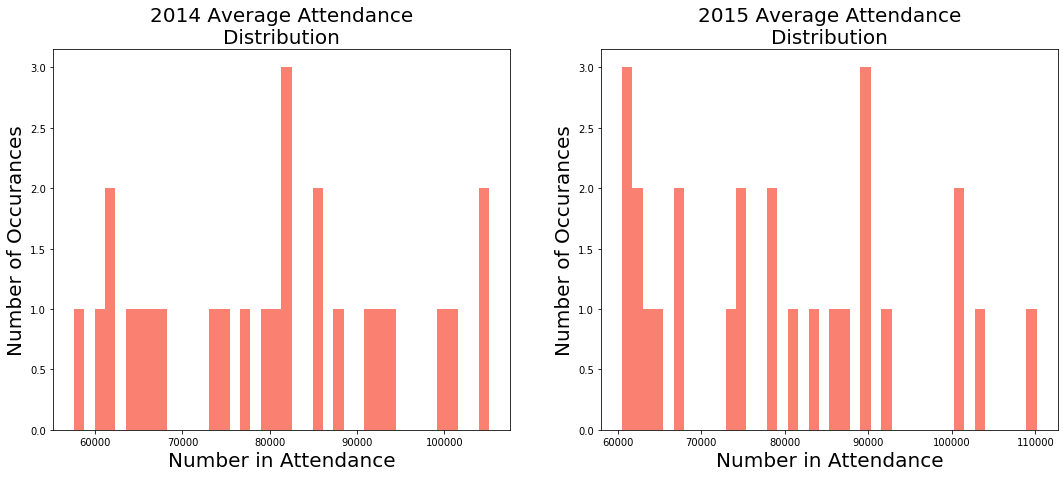

In [154]:
fig = plt.figure(figsize = (18,7))
ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)
ax1.hist(football_stats['2014 Average Attendance'], bins = 40, color = 'salmon')
ax1.set_title('2014 Average Attendance\nDistribution', fontsize = 20)
ax1.set_xlabel('Number in Attendance', fontsize = 20)
ax1.set_ylabel('Number of Occurances', fontsize = 20)
ax2.hist(football_stats['2015 Average Attendance'], bins = 40, color = 'salmon')
ax2.set_title('2015 Average Attendance\nDistribution', fontsize = 20)
ax2.set_xlabel('Number in Attendance', fontsize = 20)
ax2.set_ylabel('Number of Occurances', fontsize = 20)
plt.show()

In [161]:
from scipy.stats import ttest_ind

football_stats_2014 = football_stats['2014 Average Attendance']
football_stats_2015 = football_stats['2015 Average Attendance']

avg_attendance_2014 = football_stats_2014.mean()
avg_attendance_2015 = football_stats_2015.mean()

print('2014 mean value:',avg_attendance_2014)
print('2015 mean value:',avg_attendance_2015)

std_2014 = football_stats_2014.std()
std_2015 = football_stats_2015.std()

print('2014 std value:',std_2014)
print('2015 std value:',std_2015)

ttest,pval = ttest_ind(football_stats_2014,football_stats_2015)

print('p-value',pval)
if pval <0.05:
    print('We reject null hypothesis')
else:
    print('We accept null hypothesis')

2014 mean value: 80129.07692307692
2015 mean value: 79415.07692307692
2014 std value: 14357.81338205251
2015 std value: 14955.847118563568
p-value 0.861312711101216
We accept null hypothesis


# Straight Line Regression
The next part of this course considers problems involving modeling the relationship between two variables. The simplest meaningful model between two variables involves a straight line.

# Question

<b>To what extent can future college football attendance be predicted from past attendance? <p>Is there
evidence that the 2015 average attendance is significantly different from the 2014 average attendance?</p></b>

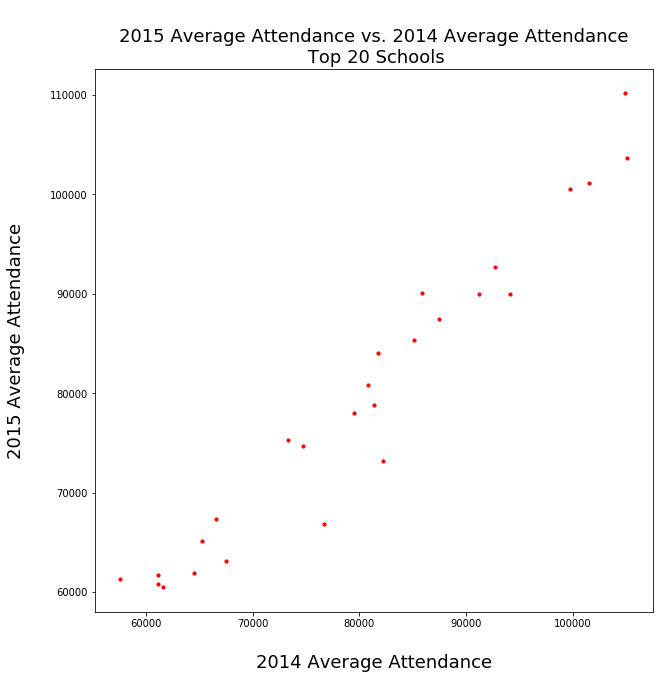

In [131]:
plt.figure(figsize = (10,10))
plt.scatter(football_stats['2014 Average Attendance'], football_stats['2015 Average Attendance'], s = 10, color = 'red')
plt.xlabel('\n2014 Average Attendance\n', fontsize = 18)
plt.ylabel('2015 Average Attendance\n', fontsize = 18)
plt.title('\n2015 Average Attendance vs. 2014 Average Attendance\n Top 20 Schools', fontsize = 18)
plt.show()

<b>Can 2015 Average Attendance be used as a function of 2014 Average Attendance?</b>

# Definition of Regression


- Mathematically, the regression of a random variable Y on a
random variable X is E(Y|X), the mean (or average value) of
Y for a given value of X.
- For example, if X = Day of the week and Y = Sales at a given
company, then the regression of Y on X represents the
mean (or average) sales on a given day.
- The X‐variable is called the <b>explanatory</b> or <b>predictor
variable</b>, while the Y‐variable is called the <b>response
variable</b> or the <b>dependent variable</b>.


In [132]:
# import statsmodels and set the data 
import statsmodels.api as sm
modeling_data = football_stats.copy()

In [133]:
# set your X variable, also called the explanatory variable
X = modeling_data['2014 Average Attendance'] 

# set the Y variable, also called the dependent variable
Y = modeling_data['2015 Average Attendance'] 

In [134]:
# in StatsModels you have to add a constant
X = sm.add_constant(X) # adding a constant

In [135]:
# fit the model and make the predicitons
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

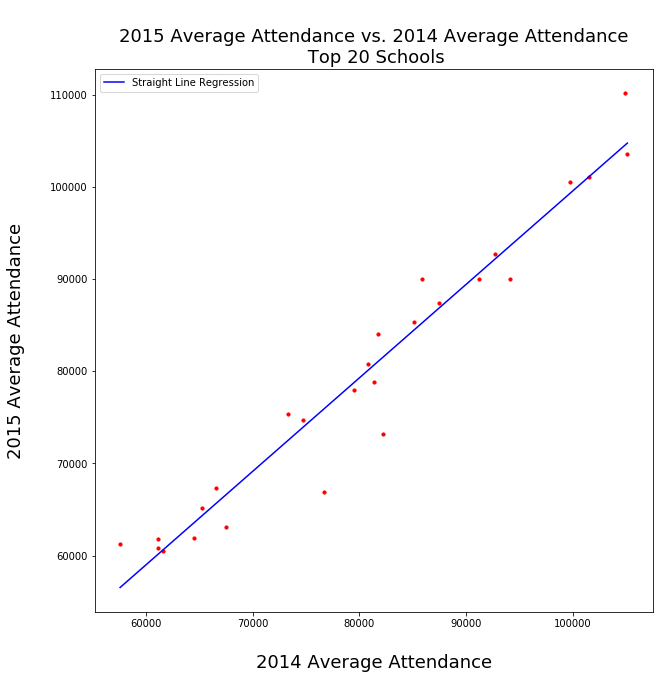

In [136]:
# plot the results
plt.figure(figsize = (10,10))
plt.scatter(football_stats['2014 Average Attendance'], football_stats['2015 Average Attendance'], s = 10, color = 'red')
plt.plot(football_stats['2014 Average Attendance'], predictions, color = 'blue', label = 'Straight Line Regression')
plt.xlabel('\n2014 Average Attendance\n', fontsize = 18)
plt.ylabel('2015 Average Attendance\n', fontsize = 18)
plt.title('\n2015 Average Attendance vs. 2014 Average Attendance\n Top 20 Schools', fontsize = 18)
plt.legend(loc = 2)
plt.show()

# Bivariate Linear Regression

<p>A <b>simple linear regression</b> (also known as a bivariate regression) is a linear equation describing the relationship between an <b>explanatory variable</b>and an <b>outcome variable</b>, specifically with the assumption that the explanatory variable influences the outcome variable, and not vice-versa.(Murray, James)</p>

<p>Mathematically, the regression of a random variable Y on a random variable X is E(Y|X), the mean (or average value) of Y for a given value of X.(Sheather, Simon)</p>

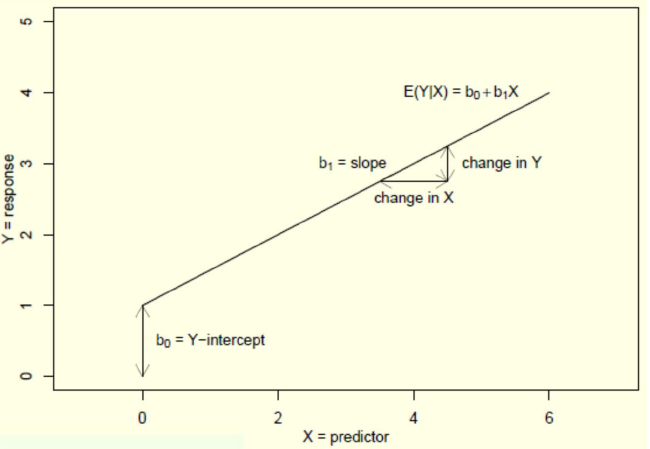

# But..... Which line fits the data best?

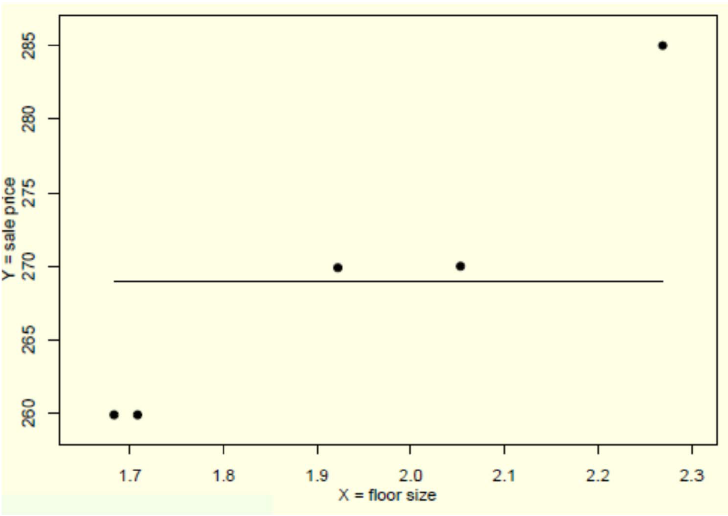


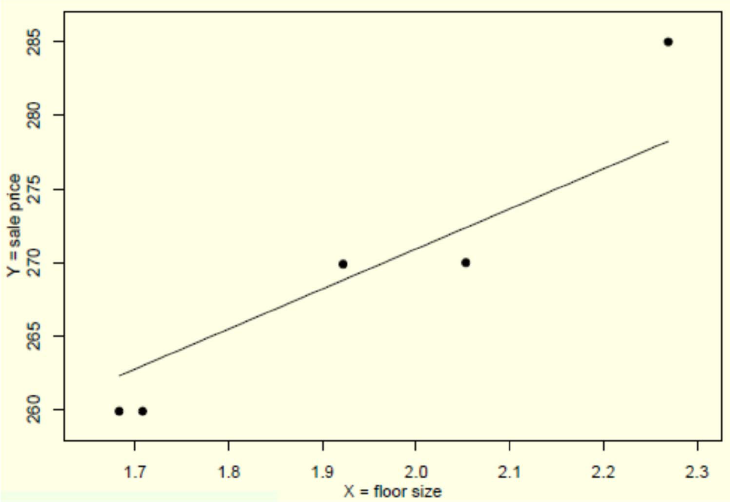

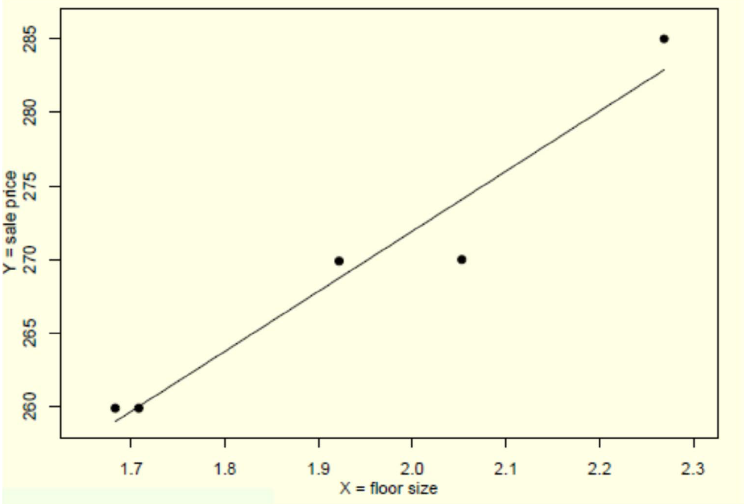

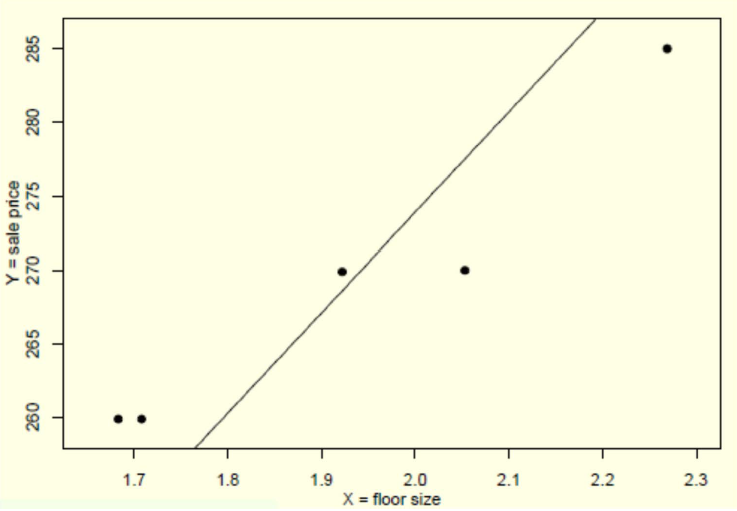

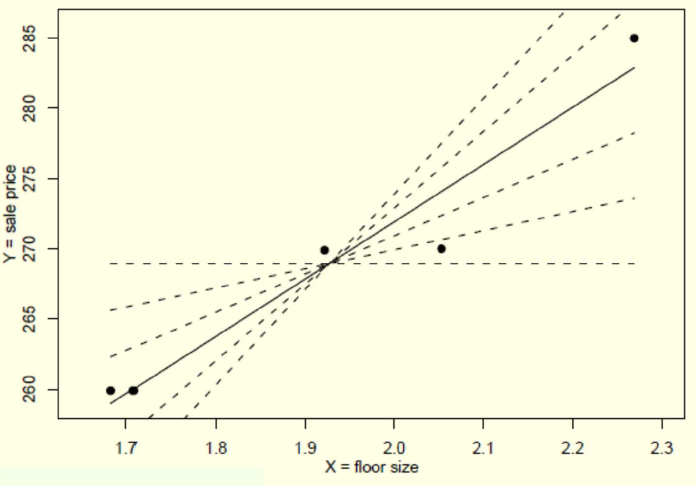

# This line fits the data best in the least squares sense

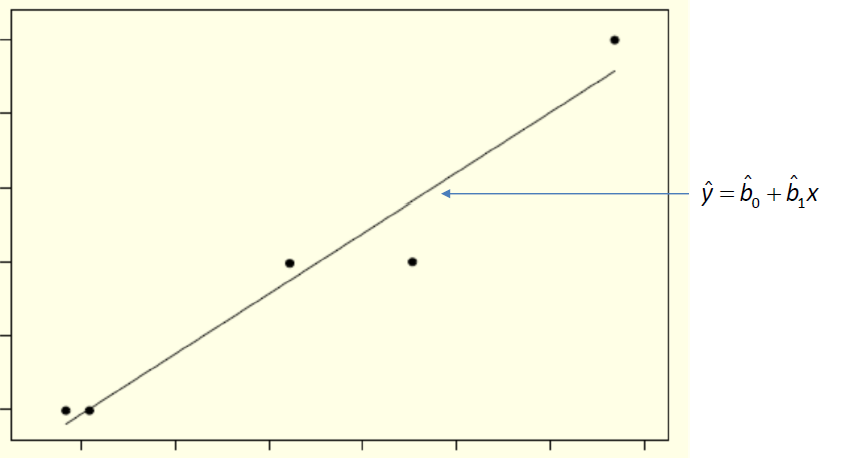

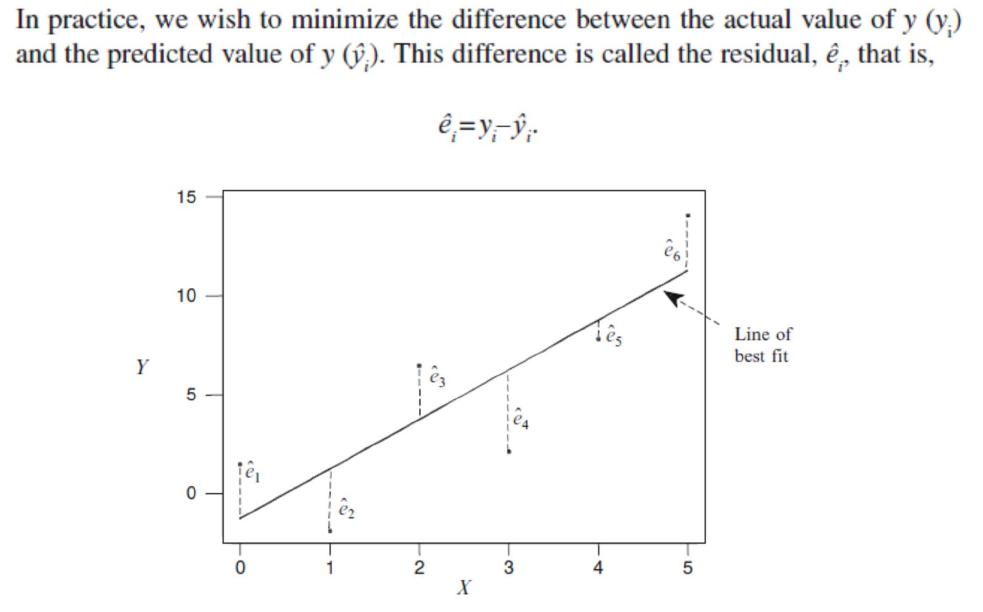

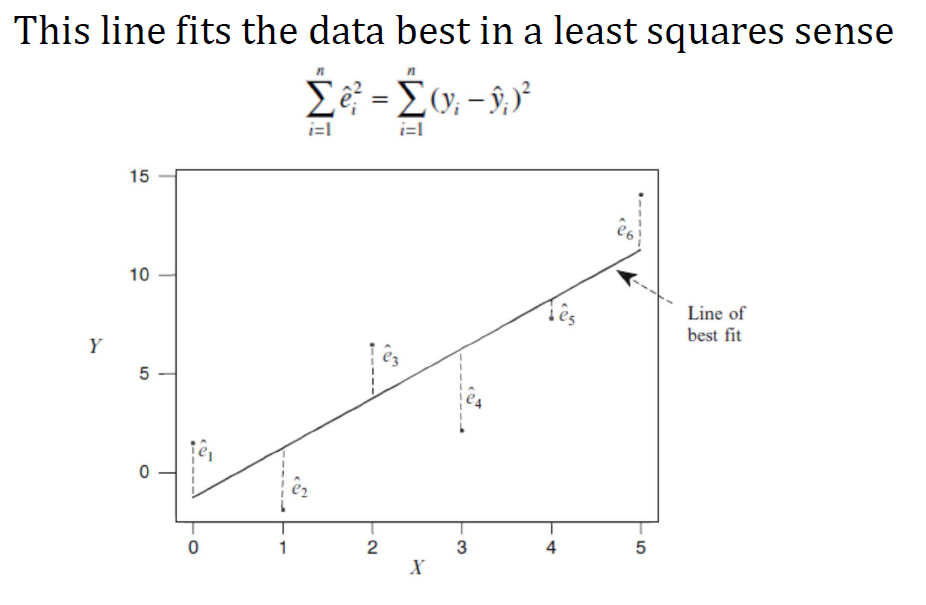

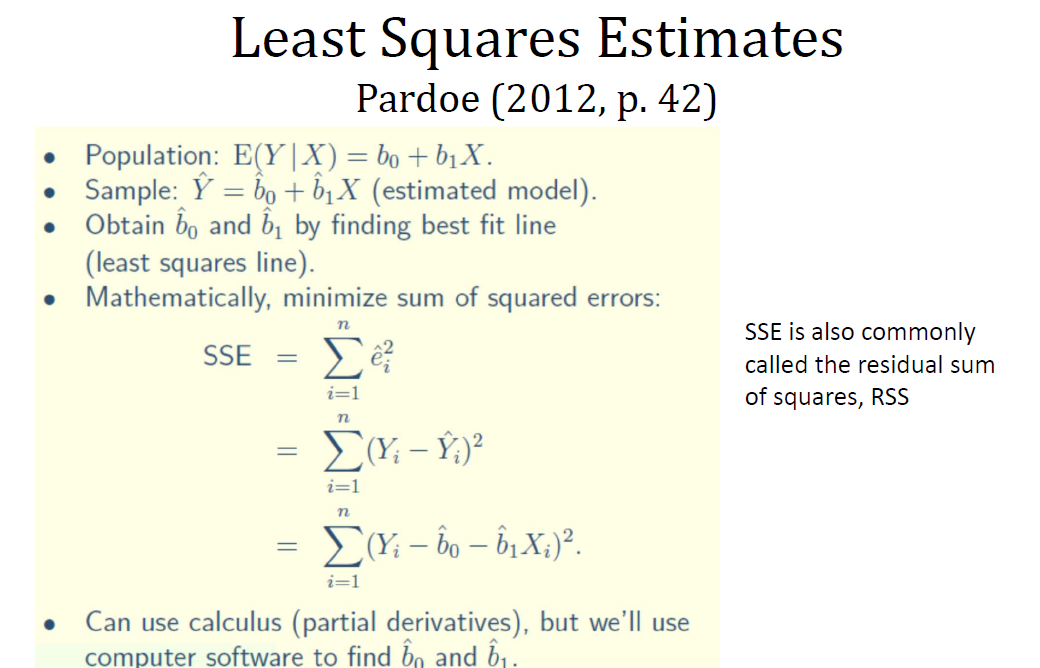

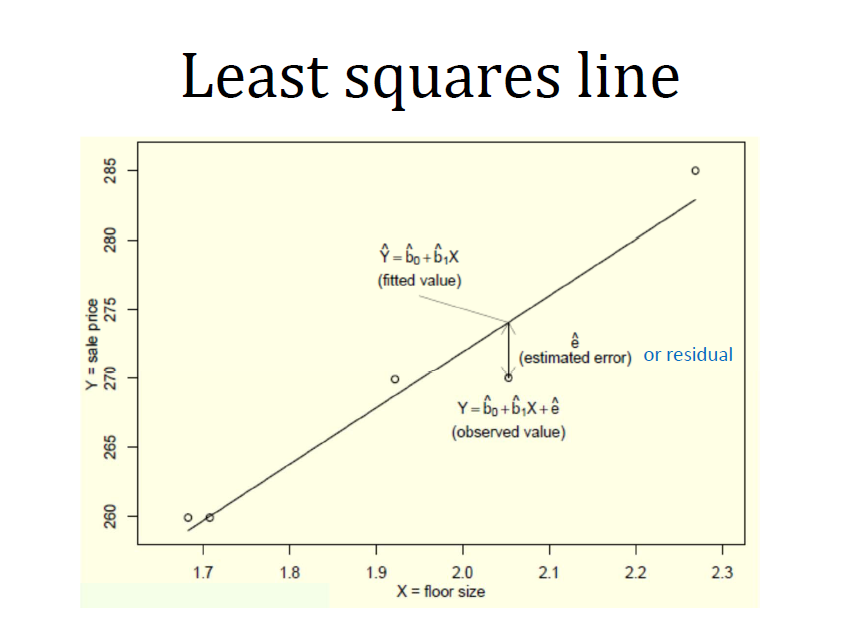

# Now let's answer the question:  To what extent can the 2015 average attendance be predicted from 2014 average attendance?

Recall the following equation:

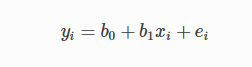

- y1 is the outcome variable (2015 Average Attendance)
- b0 is the y intercept
- b1 is the coefficent 
- xi is the explanatory variable (2014 Average Attendance)
- ei is the residual (error term in in regression)


# How do we interpret the results?

                               OLS Regression Results                              
Dep. Variable:     2015 Average Attendance   R-squared:                       0.948
Model:                                 OLS   Adj. R-squared:                  0.946
Method:                      Least Squares   F-statistic:                     439.3
Date:                     Thu, 20 Aug 2020   Prob (F-statistic):           6.17e-17
Time:                             11:10:36   Log-Likelihood:                -247.83
No. Observations:                       26   AIC:                             499.7
Df Residuals:                           24   BIC:                             502.2
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

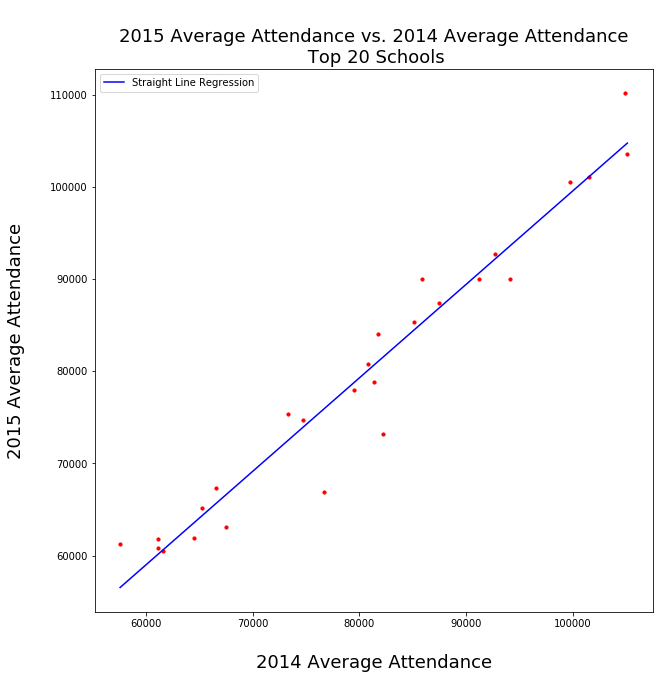

In [137]:
# print the model summary
print_model = model.summary()
#print_model
print(print_model)

# plot the results
plt.figure(figsize = (10,10))
plt.scatter(football_stats['2014 Average Attendance'], football_stats['2015 Average Attendance'], s = 10, color = 'red')
plt.plot(football_stats['2014 Average Attendance'], predictions, color = 'blue', label = 'Straight Line Regression')
plt.xlabel('\n2014 Average Attendance\n', fontsize = 18)
plt.ylabel('2015 Average Attendance\n', fontsize = 18)
plt.title('\n2015 Average Attendance vs. 2014 Average Attendance\n Top 20 Schools', fontsize = 18)
plt.legend(loc = 2)
plt.show()

# Consider this diagram  

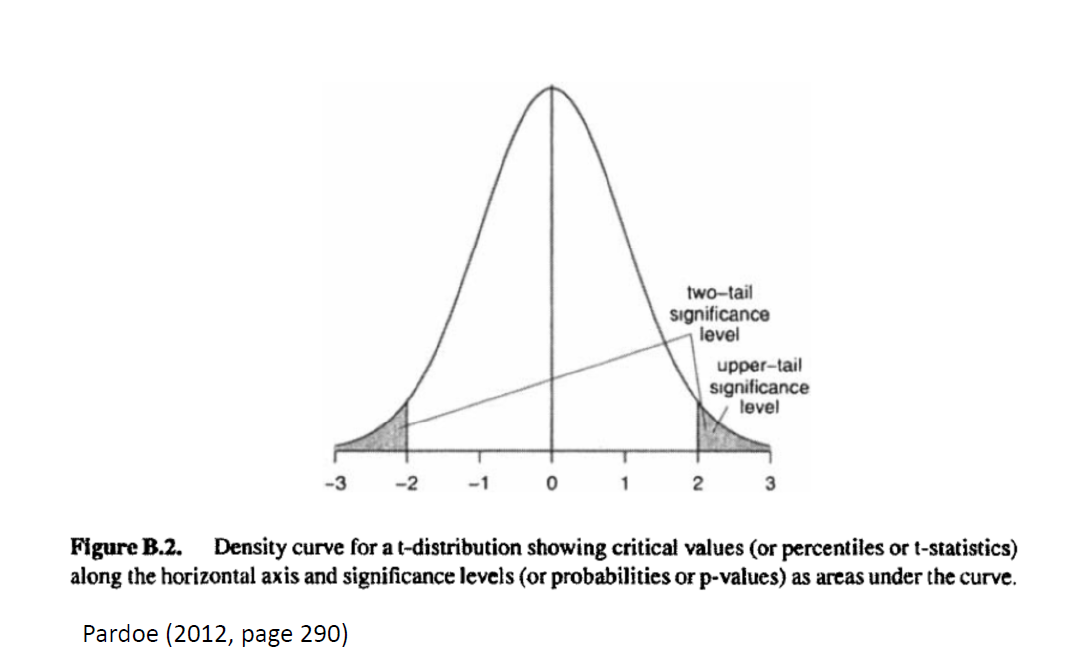

# First test the hypothesis about the intercept b0.

<p>TEST: The Null Hypothesis (Ho) Ho: b0 =  0 VS. Alternative Hypothesis (Ha): b0 does not equal zero.</p>

<p>Test statistic:  t = (b0 - 0)/Sbo <-- (Standard Error) (n = 26 observations)</p>
<p>t = (-1860.9435 - 0)/3937.148 = -0.47266283.... (-0.473 in table below)</p>
                                                    
<p>p-value:  2P(T >= -0.473) = 0641</p>
    
<p>The probability that the Null Hypothesis is true is 64.1%.</b>  

<b>The intercept b0, is not statistically significantly different from zero.</b></p>  



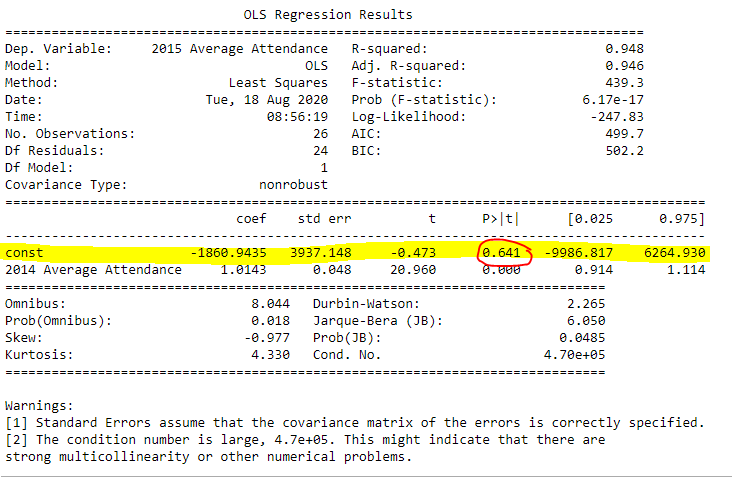

# Next test the hypothsis about the slope b1. 

<p>TEST: The Null Hypothesis (Ho) Ho: b0 =  0 VS. Alternative Hypothesis (Ha): b0 does not equal zero.</p>

<p>Test statistic:  t = (b0 - 0)/Sbo <-- (Standard Error) (n = 26 observations)</p>
<p>t = (1.0143 - 0)/0.048 = 20.960</p>
                                                    
<p>p-value:  2P(T >= 20.960) = 0.00000...</p>
    
<p>The probability that the Null Hypothesis is true is 0.0000%.</p>  

<p>Thus slope b1, is highly statistically significant.  </p>

<p><b>Thus there is a statistically significant positive linear association between attendance in 2014 and 2015.</b></b></p> 


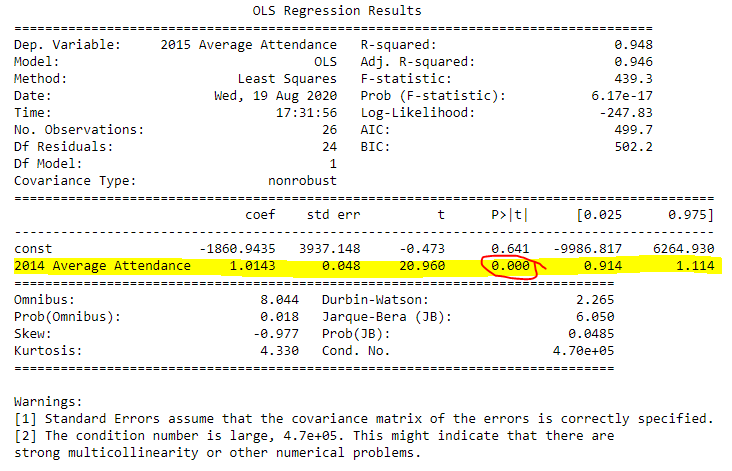

# 95% Confidence Intervals for the intercept b0 and the slope b1. 

<p>Notice also that the 95% confidence
interval for the intercept b0 (‐9986.817,
6246.930) contains the value 0. Therefore, the
intercept b0 is not statistically significantly
different from 0 at the 5% level.</p>

<p>Notice that the 95% confidence interval for
the slope b1 (0.914,1.114) contains the
value 1. Therefore, the slope b1 is not
statistically significantly different from 1 at
the 5% level.</p>


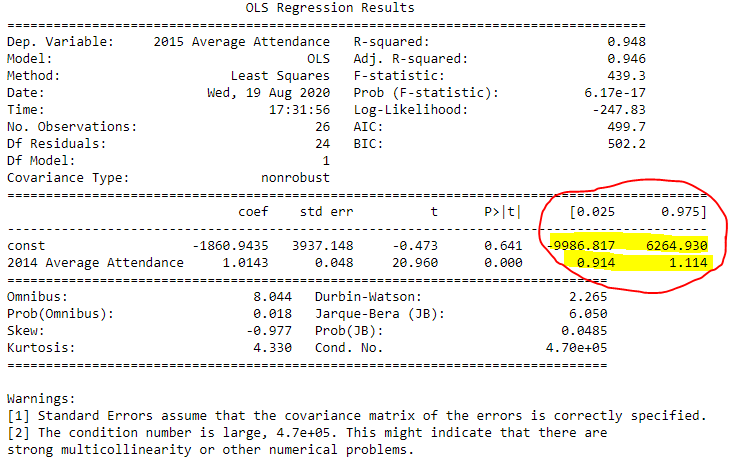

# Conclusions:  Case Study: College Football Attendance
<p>Is there evidence that the 2015 average attendance is significantly different from the 2014 average attendance?</p>
<p>
• Notice that the 95% confidence interval for the
slope b1 contains the value 1.</p>
<p>
• Notice also that the 95% confidence interval for
the intercept b0 contains the value 0.</p>
<p>
<p><b>Thus there is not strong evidence that 2015 average
attendance is significantly different from the 2014
average attendance.</b></p>

# Next find the Confidence Intervals (CI)s for the intercept and slope